In [169]:
import pandas as pd
data= pd.DataFrame({"A":[1,2,4,1,2,4],
                    'B':[4,5,6,7,8,9],
                    'C':[0,0,0,0,0,0],
                    'D':[1,1,1,1,1,1]})


In [170]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [171]:
## it wrill zero varience feature
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0)
var.fit(data)

VarianceThreshold(threshold=0)

In [172]:
var.get_support()

array([ True,  True, False, False])

In [173]:
data.columns[var.get_support()]

Index(['A', 'B'], dtype='object')

In [174]:
columns = [column for column in df.columns
          if column not in data.columns[var.get_support()]]
print(len(columns))

9


In [175]:
for feature in columns:
    print(feature)

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude
MEDV


In [176]:
df=pd.read_csv('santander.csv',nrows=10000)


In [177]:
df.shape

(10000, 371)

In [178]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [179]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [180]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(labels=['TARGET'],axis=1),
                                                df['TARGET'],
                                                test_size=0.3,
                                                random_state=0)
X_train.shape, X_test.shape

((7000, 370), (3000, 370))

In [181]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [182]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [183]:
sum(var_thres.get_support())

284

In [184]:
len(X_train.columns[var_thres.get_support()])

284

In [185]:
constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

86


In [186]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [187]:
X_train.drop(constant_columns, axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


## 2. Feature Selection - with Correlation
 ###### in this step we will be removing the fetaure which are highly correlated


In [201]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
# loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [203]:
 df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [204]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [205]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [206]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
X,
y,
test_size=0.3,
random_state=0)
X_train.shape,X_test.shape

((354, 13), (152, 13))

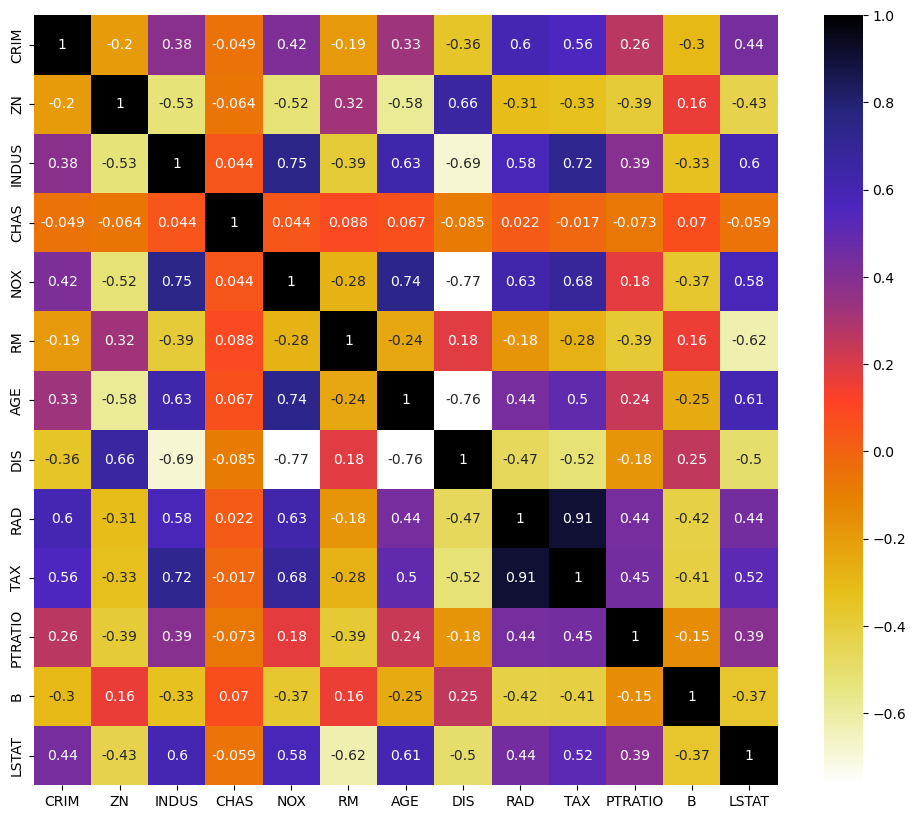

In [213]:
import seaborn as sns
#using person corrreletion
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [222]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correleated with anything in other feature
def correlation(dataset,threshold):
    col_corr = set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are intrested in absolute coeff value
                colname = corr_matrix.columns[i] # getting thre names of column 
                col_corr.add(colname)
    return col_corr

In [223]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

3

In [224]:
corr_features

{'AGE', 'NOX', 'TAX'}

In [227]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0141,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,6.0622,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,1.9356,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,1.4261,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,3.3175,4.0,18.4,396.90,4.54


In [228]:
df = pd.read_csv('santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'],axis=1)
y=df['TARGET']
# seperate dataset into train and split
X_train,X_test,y_tarin,y_test = train_test_split(
 df.drop(labels=['TARGET'],axis=1),
 df['TARGET'],
 test_size=0.3,
 random_state=0)

<AxesSubplot:>

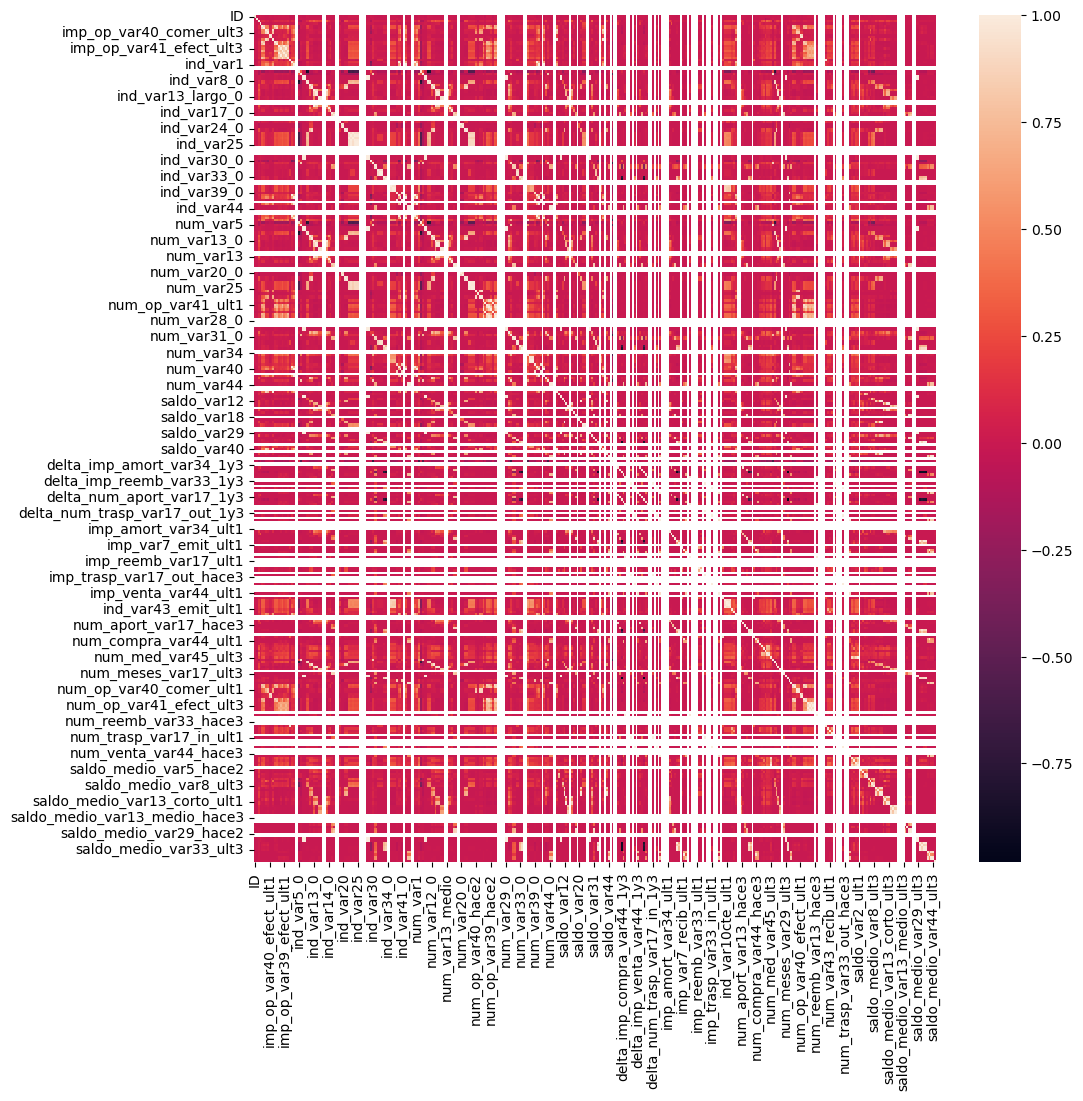

In [231]:
import seaborn as sns
# using pearson correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [235]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

155

In [241]:
corr_features

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17

In [243]:
X_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


In [244]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [245]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
                                              df['Wine'],
                                              test_size=0.3,
                                              random_state=0)

In [252]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [253]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.41926636, 0.29963719, 0.14822847, 0.27230655, 0.18711062,
       0.45199367, 0.7165149 , 0.13715115, 0.25762266, 0.63123956,
       0.54600932, 0.54255252, 0.53529586])

In [254]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.716515
Color.int               0.631240
Hue                     0.546009
OD                      0.542553
Proline                 0.535296
Phenols                 0.451994
Alcohol                 0.419266
Malic.acid              0.299637
Acl                     0.272307
Proanth                 0.257623
Mg                      0.187111
Ash                     0.148228
Nonflavanoid.phenols    0.137151
dtype: float64

In [255]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [256]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [257]:
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [271]:
#let's perform label encoding on sex column
import numpy as np
df['sex']=np.where(df['sex']=='male',1,0)
## let's perform label encoding on embarked
ordinal_label = {k:i for i,k in enumerate(df['embarked'].unique(),0)}
df['embarked'] = df['embarked'].map(ordinal_label)
# let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)  

In [272]:
df.head()

,sex,embarked,alone,pclass,survived
0,0,0,1,3,0
1,0,1,1,1,1
2,0,0,0,3,1
3,0,0,1,1,1
4,0,0,0,3,0


In [269]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [270]:
X_train.head()

,sex,embarked,alone,pclass
69,0,0,1,3
85,0,0,1,3
794,0,0,0,3
161,0,0,0,2
815,0,0,0,1
